# Importing Required Packages

In [1]:
# Data Wrangling
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Modelling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
# Set default figure size for the entire notebook
plt.rcParams['figure.figsize'] = [14, 6]

# Importing Data

In [3]:
df = pd.read_excel('./data/AnimalShelter.xlsx')
df.head()

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Obedience*,Weight at Intake (lbs)*,Height (in)*,Weight at Outcome (lbs)*,AgeAtIntake,TimeAtShelter,AgeAtOutcome
0,A785936,NO,2018-12-13 10:57:59.962,2019-03-13 09:20:00.010,2018-12-12,Stray,Nursing,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,2.03,2.05,5.31,1,89,91
1,A774111,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:11:59.971,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.17,3.39,11.17,31,276,307
2,A774113,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:11:59.971,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.47,3.39,11.47,31,276,307
3,A774114,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:09:59.962,2018-05-10,Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,...,Adoption,Foster,Neutered Male,NaN,3.51,3.40,11.51,31,276,307
4,A774115,GIVEN,2018-06-10 01:41:59.971,2019-03-13 09:09:59.962,2018-05-10,Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,Adoption,Foster,Spayed Female,NaN,3.83,3.39,11.83,31,276,307


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95501 entries, 0 to 95500
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Animal ID                 95501 non-null  object        
 1   Name                      95501 non-null  object        
 2   IntakeDT                  95501 non-null  datetime64[ns]
 3   OutcomeDT                 95501 non-null  datetime64[ns]
 4   DOB                       95501 non-null  datetime64[ns]
 5   Intake Type               95501 non-null  object        
 6   Intake Condition          95501 non-null  object        
 7   Animal Type               95501 non-null  object        
 8   Sex upon Intake           95501 non-null  object        
 9   Breed                     95501 non-null  object        
 10  Color                     95501 non-null  object        
 11  Outcome Type              95501 non-null  object        
 12  Outcome Subtype   

In [5]:
df.shape

(95501, 21)

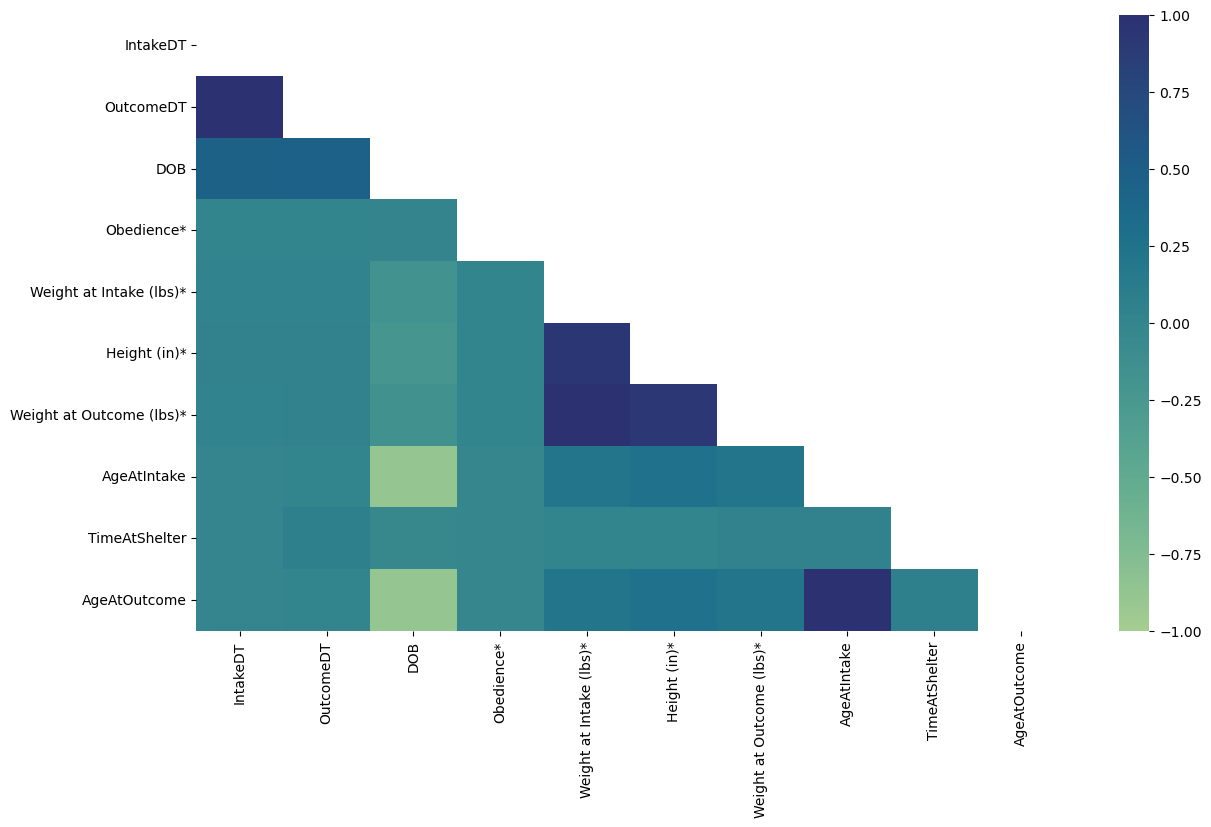

In [6]:
fig, ax = plt.subplots(figsize=(14, 8))

corr_matrix = df.select_dtypes(exclude='object').corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix, cmap="crest", vmin=-1, vmax=1, mask=mask)

In [7]:
df.isna().sum()

Animal ID                       0
Name                            0
IntakeDT                        0
OutcomeDT                       0
DOB                             0
Intake Type                     0
Intake Condition                0
Animal Type                     0
Sex upon Intake                 0
Breed                           0
Color                           0
Outcome Type                    0
Outcome Subtype                 0
Sex upon Outcome                0
Obedience*                  40660
Weight at Intake (lbs)*      5952
Height (in)*                 5952
Weight at Outcome (lbs)*     5952
AgeAtIntake                     0
TimeAtShelter                   0
AgeAtOutcome                    0
dtype: int64

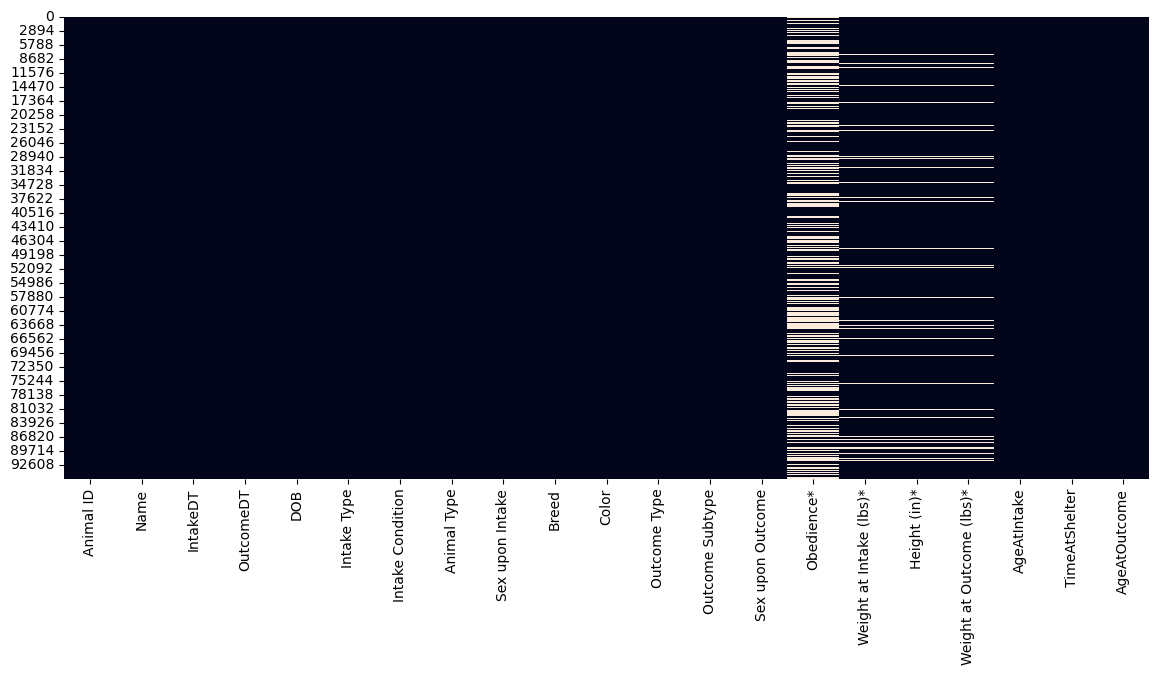

In [8]:
sns.heatmap(df.isna(), cbar=False);

In [9]:
df.duplicated().sum()

0

In [10]:
# Creating color palette for our categorical features
animal_palette = {'Dog': '#457b9d', 'Cat': '#3a5a40', 'Other': '#a5a58d', 'Bird': '#fb8b24', 'Livestock': '#8B4513'}
intake_type_palette = {'Stray': '#495057', 'Owner Surrender': '#FFD700',
                       'Euthanasia Request': '#8B0000','Public Assist': '#4682B4','Wildlife': '#228B22' }
condition_palette = {'Normal': '#386641', 'Injured': '#9d0208', 'Nursing': '#FF69B4', 'Sick': '#FFA500',
                     'Other': '#D3D3D3', 'Pregnant': '#FFD700', 'Aged': '#8B4513', 'Feral': '#A9A9A9'}
outcome_palette = {'Adoption': '#386641', 'Euthanasia':'#bc4749'}

In [11]:
df["Animal ID"].nunique() == len(df)

False

In [12]:
# Why some Animal IDs are duplicate?
df[df["Animal ID"].duplicated(keep=False)].sort_values(by=["Animal ID", "IntakeDT"]).head(3).T

,89134,73840,20720
Animal ID,A006100,A006100,A006100
Name,YES,YES,YES
IntakeDT,2014-03-07 02:26:00.010000,2014-12-19 10:21:00,2017-12-07 02:06:59.962000
OutcomeDT,2014-03-08 05:10:00.019000,2014-12-20 04:34:59.981000,2017-12-07 12:00:00
DOB,2007-07-09 00:00:00,2007-07-09 00:00:00,2007-07-09 00:00:00
Intake Type,Public Assist,Public Assist,Stray
Intake Condition,Normal,Normal,Normal
Animal Type,Dog,Dog,Dog
Sex upon Intake,Neutered Male,Neutered Male,Neutered Male
Breed,Spinone Italiano,Spinone Italiano,Spinone Italiano


This highlights that some animals have been brought to the shelter more than once and this duplicity in the `Animal ID` is not a data entry error. Also, the above specific dog seems to have ran away from his home and his weight loss trend suggests that he might not have a good condition at home, thus could be a factor of the animal becoming `stray`. Perhaps, we can create a feature stating whether this is the first time they have been brought to the shelter or not and evaluate its implication on the `outcome type`.

In [13]:
df['Brought Before'] = df["Animal ID"].duplicated(keep=False)

In [14]:
df["Outcome Type"].unique()

array(['Adoption', 'Euthanasia', 'Return to Owner', 'Transfer',
       'Rto-Adopt', 'Died', 'Missing', 'Relocate'], dtype=object)

The research question is contributing factors to `Adoption` vs `Euthanasia` decision. Since there are more outcome types and our focus is only on two of them, before any further analysis, we filter out the dataframe based on these two outcomes only.

In [15]:
df = df[df["Outcome Type"].isin(['Adoption', 'Euthanasia'])].sort_values(by=['IntakeDT']).reset_index(drop=True)

In [16]:
df["Name"].unique()

array(['YES', 'GIVEN', 'NO'], dtype=object)

An animal either has or does not have a name; so we can make this feature binary which would be also helpful in our tree model.

In [17]:
df["Name"] = df["Name"].map({'YES': 1, 'GIVEN': 1, 'NO': 0})

In [18]:
df["IntakeYear"] = df["IntakeDT"].dt.year
df["IntakeMonthNo"] = df["IntakeDT"].dt.month
df["IntakeMonthName"] = df["IntakeDT"].dt.strftime("%b")
df["IntakeWeekDayNo"] = df["IntakeDT"].dt.weekday
df["OutcomeYear"] = df["OutcomeDT"].dt.year
df["OutcomeMonthNo"] = df["OutcomeDT"].dt.month
df["OutcomeWeekDay"] = df["OutcomeDT"].dt.strftime("%a")
df["OutcomeWeekDayNo"] = df["OutcomeDT"].dt.weekday

# Date Analysis
* Which `Year/Month/Weekday` has the highest intake of animals?
* Is there a `Seasonal Trend` in the intake of animals (e.g., more animals in summer or winter)?

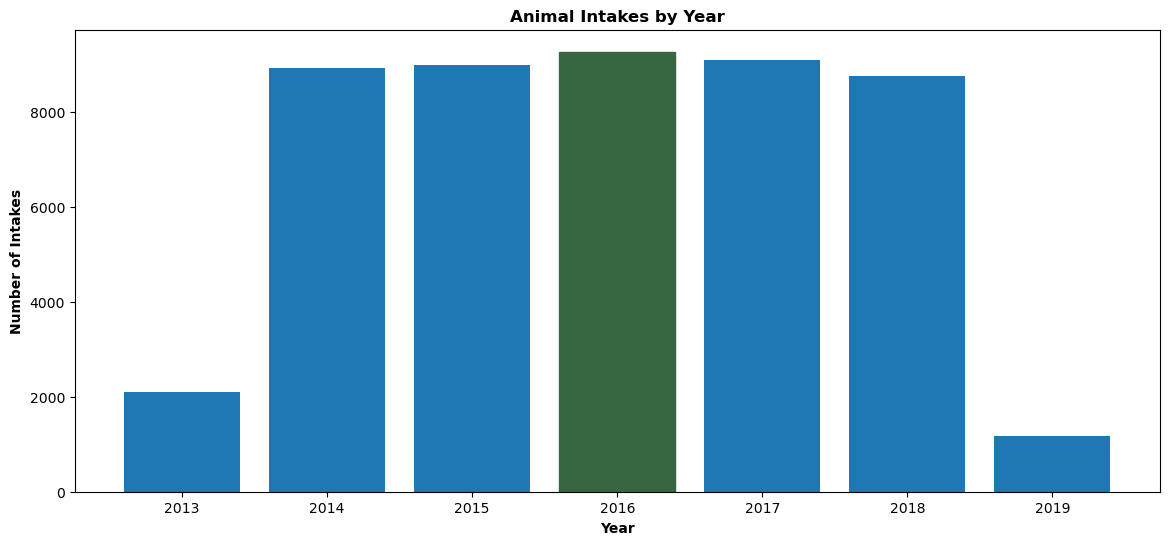

In [19]:
# Plotting
fig, ax = plt.subplots()
bars = plt.bar(x=df["IntakeYear"].unique(), height=df.groupby(["IntakeYear"]).size(), color='#1f77b4')

# Determining max year
max_ind = np.argmax(bars.datavalues)
bars[max_ind].set_color('#386641')

# Annotating
ax.set_title('Animal Intakes by Year', fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Number of Intakes', fontweight='bold')

plt.show()

In [20]:
# Function to update the plot based on the selected year
def month_chart(year):
    filtered_df = df[df['IntakeYear'] == year].sort_values("IntakeMonthNo")
    
    fig, ax = plt.subplots()
    
    bars = ax.bar(x=filtered_df["IntakeMonthName"].unique(),
                  height=filtered_df.groupby(["IntakeMonthNo"]).size(), color='#1f77b4')
    max_ind = np.argmax(bars.datavalues)
    bars[max_ind].set_color('#386641')
    
    ax.set_title(f'Animal Intakes by Month for {year}', fontweight='bold')
    ax.set_xlabel('Month', fontweight='bold')
    ax.set_ylabel('Number of Intakes', fontweight='bold')
    plt.show()

# Create a year slider
year_slider = widgets.IntSlider(value=df['IntakeYear'].min(), min=df['IntakeYear'].min(),
                                max=df['IntakeYear'].max(), step=1, description='Year:')

# Link the slider to the month_chart function
interactive_plot  = widgets.interactive(month_chart, year=year_slider)

# Display the slider
display(interactive_plot)

interactive(children=(IntSlider(value=2013, description='Year:', max=2019, min=2013), Output()), _dom_classes=…

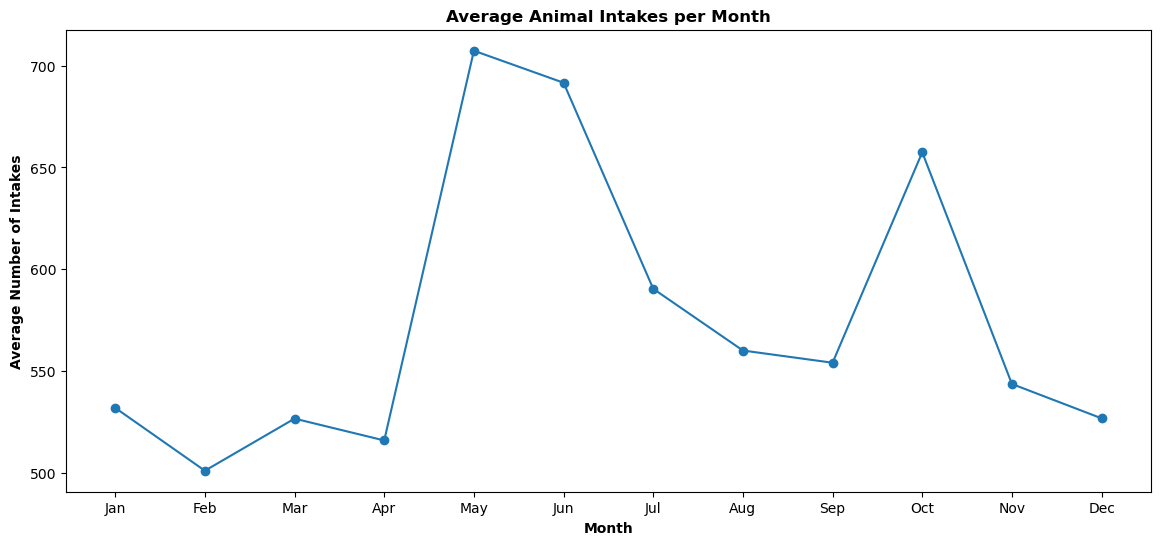

In [21]:
fig, ax = plt.subplots()
markers = pd.crosstab(df["IntakeMonthNo"], df["IntakeYear"], dropna=False).mean(axis=1).plot(ax=ax, marker='o')
plt.xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('Average Animal Intakes per Month', fontweight='bold')
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Average Number of Intakes', fontweight='bold')
plt.show()

In [22]:
def week_chart(year, In_Out):
    filtered_df = df[df["IntakeYear"] == year]
    
    fig, ax = plt.subplots()
    filtered_df.groupby(In_Out).size().plot(ax=ax, marker='o')
    
    plt.xticks(range(0, 7))
    ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    if In_Out == "IntakeWeekDayNo":
        ax.set_title(f'Average Animal Intake per Weekday in {year}', fontweight='bold')
        ax.set_xlabel('Weekday', fontweight='bold')
        ax.set_ylabel('Average Animal Intake', fontweight='bold')
    else:
        ax.set_title(f'Average Animal Outcome per Weekday in {year}', fontweight='bold')
        ax.set_xlabel('Weekday', fontweight='bold')
        ax.set_ylabel('Average Animal Outcome', fontweight='bold')        
    plt.show()

# Create a year slider
year_slider = widgets.IntSlider(value=df['IntakeYear'].min(), min=df['IntakeYear'].min(),
                                max=df['IntakeYear'].max(), step=1, description='Year:')

# Create a dropdown for Intake_Outcome
Intake_Outcome_dropdown = widgets.Dropdown(options=["IntakeWeekDayNo", "OutcomeWeekDayNo"], description='In/Out')

# Link the slider to the week_chart function
interactive_plot  = widgets.interactive(week_chart, year=year_slider, In_Out=Intake_Outcome_dropdown)

# Display the slider
display(interactive_plot)

interactive(children=(IntSlider(value=2013, description='Year:', max=2019, min=2013), Dropdown(description='In…

# Time of Day
* At what `Time of Day` are most animals brought in?

In [23]:
df[(df["IntakeDT"].dt.hour > df["OutcomeDT"].dt.hour) & (df["IntakeDT"].dt.date == df["OutcomeDT"].dt.date)]

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,AgeAtOutcome,Brought Before,IntakeYear,IntakeMonthNo,IntakeMonthName,IntakeWeekDayNo,OutcomeYear,OutcomeMonthNo,OutcomeWeekDay,OutcomeWeekDayNo
18,A664233,1,2013-10-01 08:53:00.010,2013-10-01 03:33:00.029,2010-09-30,Stray,Injured,Dog,Intact Female,Pit Bull,...,1097,False,2013,10,Oct,1,2013,10,Tue,1
19,A664238,0,2013-10-01 09:33:00.029,2013-10-01 04:47:00.038,2013-06-01,Stray,Normal,Cat,Unknown,American Shorthair Mix,...,122,False,2013,10,Oct,1,2013,10,Tue,1
20,A664234,0,2013-10-01 10:36:59.990,2013-10-01 07:09:00.029,2005-10-01,Stray,Injured,Dog,Intact Male,Border Collie,...,2922,False,2013,10,Oct,1,2013,10,Tue,1
91,A664475,0,2013-10-04 10:07:00.019,2013-10-04 05:24:59.962,2011-10-04,Stray,Injured,Dog,Intact Male,Chihuahua Shorthair,...,731,False,2013,10,Oct,4,2013,10,Fri,4
151,A529890,1,2013-10-06 11:57:00.029,2013-10-06 04:05:59.971,2003-12-03,Euthanasia Request,Normal,Dog,Intact Male,Pit Bull,...,3595,False,2013,10,Oct,6,2013,10,Sun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48196,A789707,0,2019-02-26 12:13:00.019,2019-02-26 01:38:00.038,2018-02-26,Wildlife,Sick,Other,Unknown,Raccoon Mix,...,365,False,2019,2,Feb,1,2019,2,Tue,1
48236,A789887,0,2019-03-01 12:38:00.010,2019-03-01 01:16:59.981,2018-03-01,Wildlife,Injured,Other,Unknown,Bat Mix,...,365,False,2019,3,Mar,4,2019,3,Fri,4
48326,A790269,0,2019-03-07 12:09:00.000,2019-03-07 01:05:00.010,2017-03-07,Wildlife,Sick,Other,Unknown,Raccoon,...,730,False,2019,3,Mar,3,2019,3,Thu,3
48332,A789940,0,2019-03-08 11:30:59.990,2019-03-08 02:23:00.038,2019-01-02,Owner Surrender,Normal,Cat,Spayed Female,Domestic Shorthair Mix,...,65,True,2019,3,Mar,4,2019,3,Fri,4


There are some descrepancies in the time they have recorded for intake and outcome for those animals staying less than 1 day. For these cases, the outcome time is before the intake time. So, before time analysis, considering that the time is correct, we just change them to p.m.

In [24]:
desc_records = df[(df["IntakeDT"].dt.hour > df["OutcomeDT"].dt.hour) & (df["IntakeDT"].dt.date == df["OutcomeDT"].dt.date)].index
df.loc[desc_records, "OutcomeDT"] += pd.Timedelta(hours=12)

In [25]:
df["IntakeHour"] = df["IntakeDT"].dt.hour
df["OutcomeHour"] = df["OutcomeDT"].dt.hour

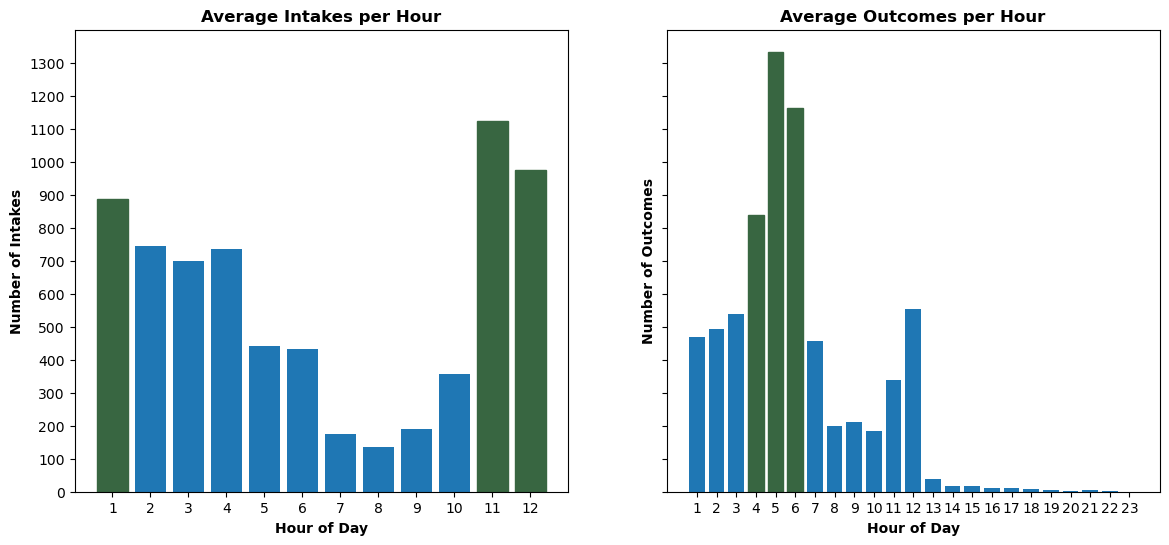

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey= True)

# Intakes
in_groups = pd.crosstab(df["IntakeHour"], df["IntakeYear"]).mean(axis=1)
in_bars = ax1.bar(height = in_groups, x=in_groups.index)

# Highlighting 
indices = np.argpartition(in_bars.datavalues, -3)[-3:]
for ind in indices:
    in_bars[ind].set_color('#386641')

# Outcomes
out_groups = pd.crosstab(df["OutcomeHour"], df["IntakeYear"]).mean(axis=1)
out_bars = ax2.bar(height = out_groups, x=out_groups.index)

# Highlighting 
indices = np.argpartition(out_bars.datavalues, -3)[-3:]
for ind in indices:
    out_bars[ind].set_color('#386641')

ax1.set_xticks(range(1, 13))
ax1.set_yticks(np.linspace(0, 1300,14))
ax1.set_title('Average Intakes per Hour', fontweight='bold')
ax1.set_ylabel('Number of Intakes', fontweight='bold')
ax1.set_xlabel('Hour of Day', fontweight='bold')

ax2.set_xticks(range(1, 24))
ax2.set_yticks(np.linspace(0, 1300,14))
ax2.set_title('Average Outcomes per Hour', fontweight='bold')
ax2.set_ylabel('Number of Outcomes', fontweight='bold')
ax2.set_xlabel('Hour of Day', fontweight='bold');

# Time at Shelter
* How long do animals `Typically Stay` in the shelter before an outcome is decided?* 
Does a longer stay correlate with a higher`Llikelihood ofEeuthanasi`a?

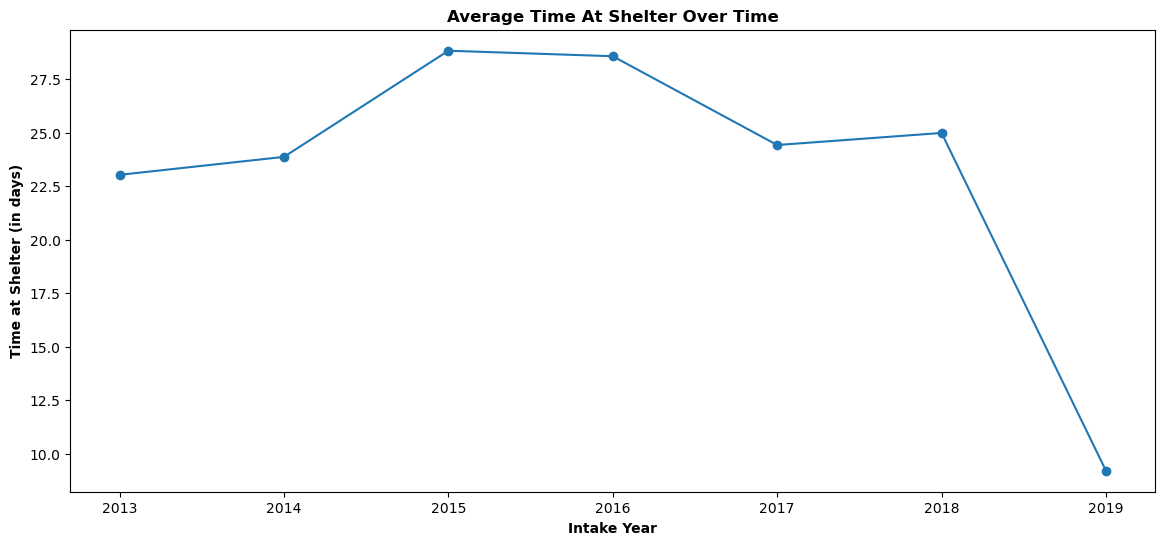

In [27]:
df.groupby(["IntakeYear"])["TimeAtShelter"].mean().plot(marker='o')
plt.title("Average Time At Shelter Over Time", fontweight='bold')
plt.xlabel('Intake Year', fontweight='bold')
plt.ylabel('Time at Shelter (in days)', fontweight='bold')
plt.xticks(rotation=0);

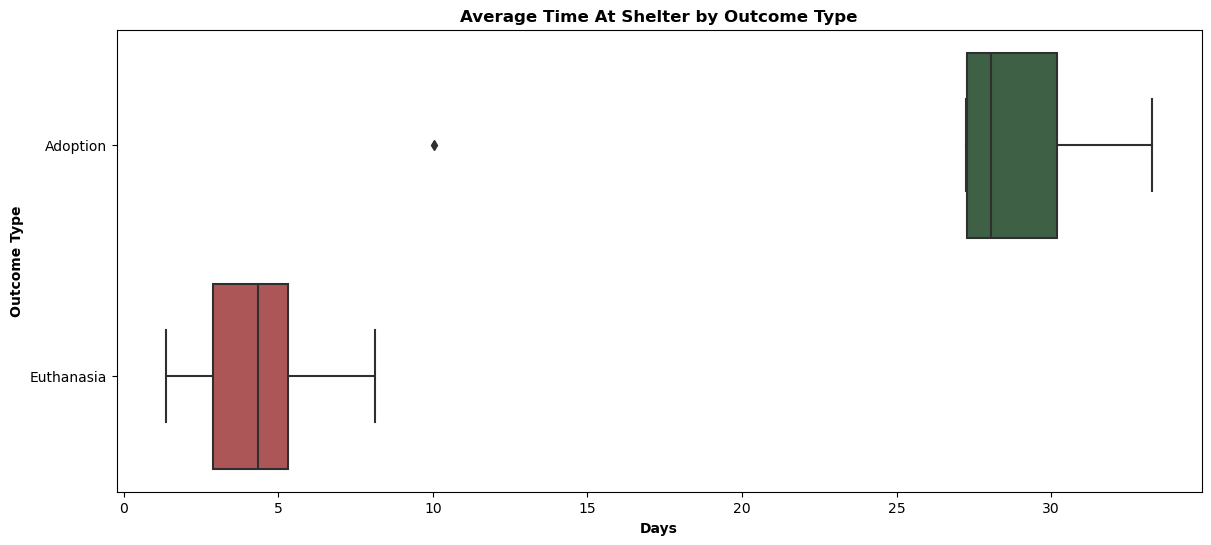

In [28]:
outcome_time = pd.crosstab(df["Outcome Type"], df["IntakeYear"], values=df["TimeAtShelter"], aggfunc='mean').T.reset_index()
outcome_time = outcome_time.melt(id_vars='IntakeYear', var_name='OutcomeType', value_name='TimeAtShelter')

sns.boxplot(data=outcome_time, x='TimeAtShelter', y='OutcomeType', palette=outcome_palette)
plt.title("Average Time At Shelter by Outcome Type", fontweight='bold')
plt.xlabel('Days', fontweight='bold')
plt.ylabel('Outcome Type', fontweight='bold');

# Animal Type
* Which `Type of Animal` is most commonly brought in?
* How does the type of animal correlate with the `Outcome Type`?

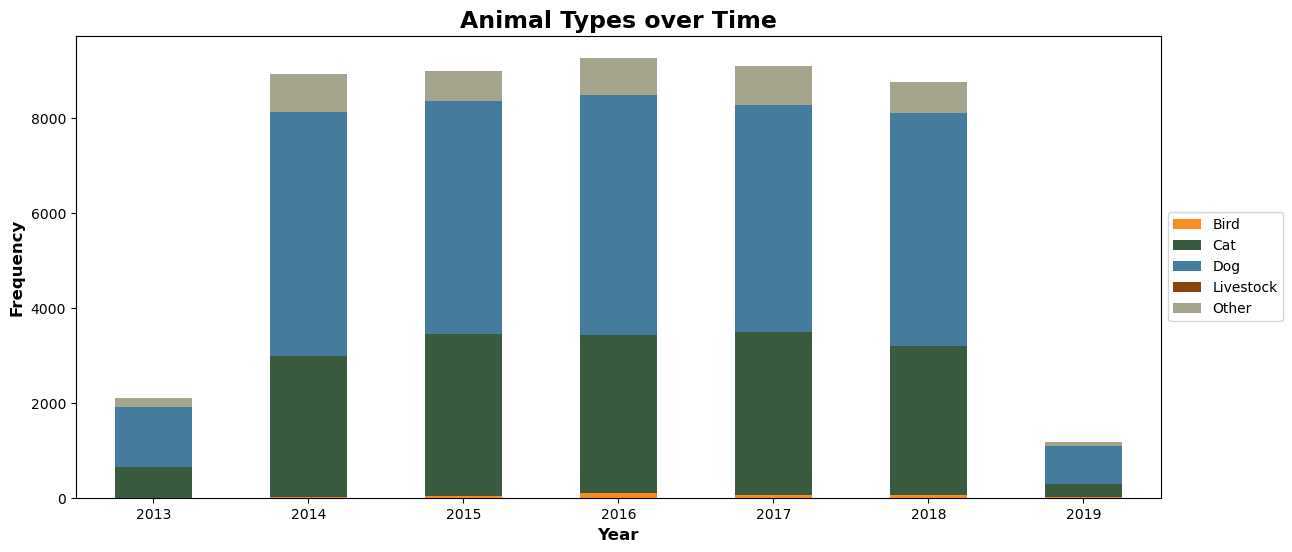

In [29]:
fig, ax = plt.subplots()
pd.crosstab(df["IntakeYear"], df["Animal Type"]).plot.bar(stacked=True, color=animal_palette, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Animal Types over Time", fontweight='bold', fontsize=17)
plt.xlabel("Year", fontweight='bold', fontsize=12)
plt.ylabel("Frequency", fontweight='bold', fontsize=12)
plt.xticks(rotation=0);

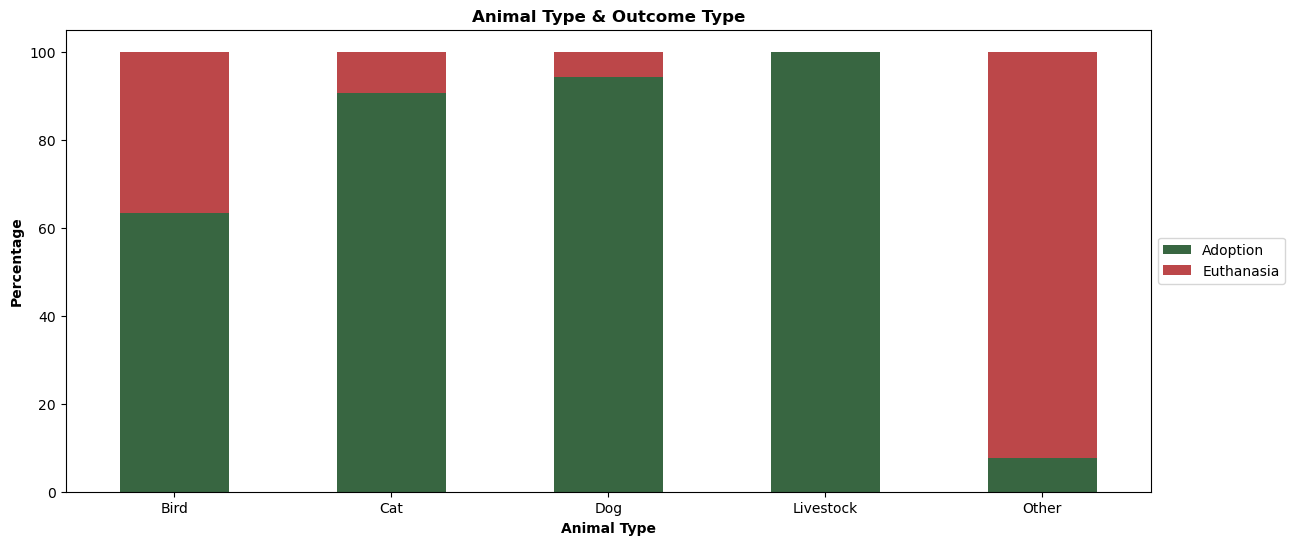

In [30]:
crosstab = pd.crosstab(df["Animal Type"], df["Outcome Type"])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)*100
crosstab_normalized.plot(kind='bar', stacked=True, color=outcome_palette)
plt.ylabel('Percentage', fontweight='bold')
plt.xlabel('Animal Type', fontweight='bold')
plt.title('Animal Type & Outcome Type', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Intake Type
* Which intake type is `Most Common`?
* How does the intake type correlate with the `Outcome Type`?

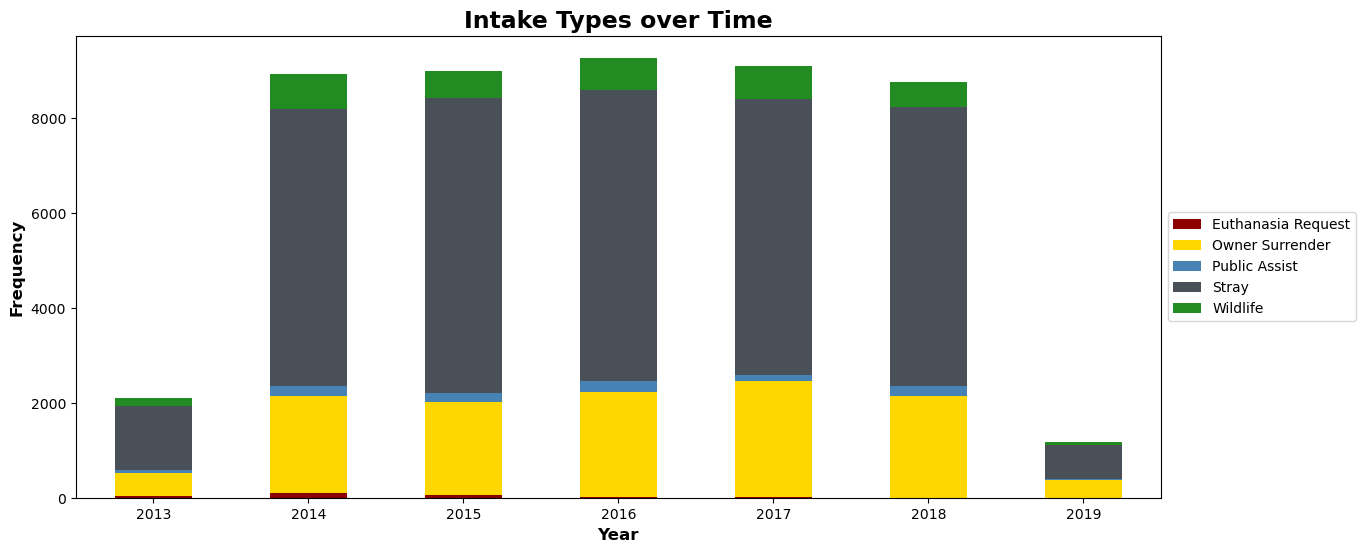

In [31]:
fig, ax = plt.subplots()
pd.crosstab(df["IntakeYear"], df["Intake Type"]).plot.bar(stacked=True, color=intake_type_palette, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Intake Types over Time", fontweight='bold', fontsize=17)
plt.xlabel("Year", fontweight='bold', fontsize=12)
plt.ylabel("Frequency", fontweight='bold', fontsize=12)
plt.xticks(rotation=0);

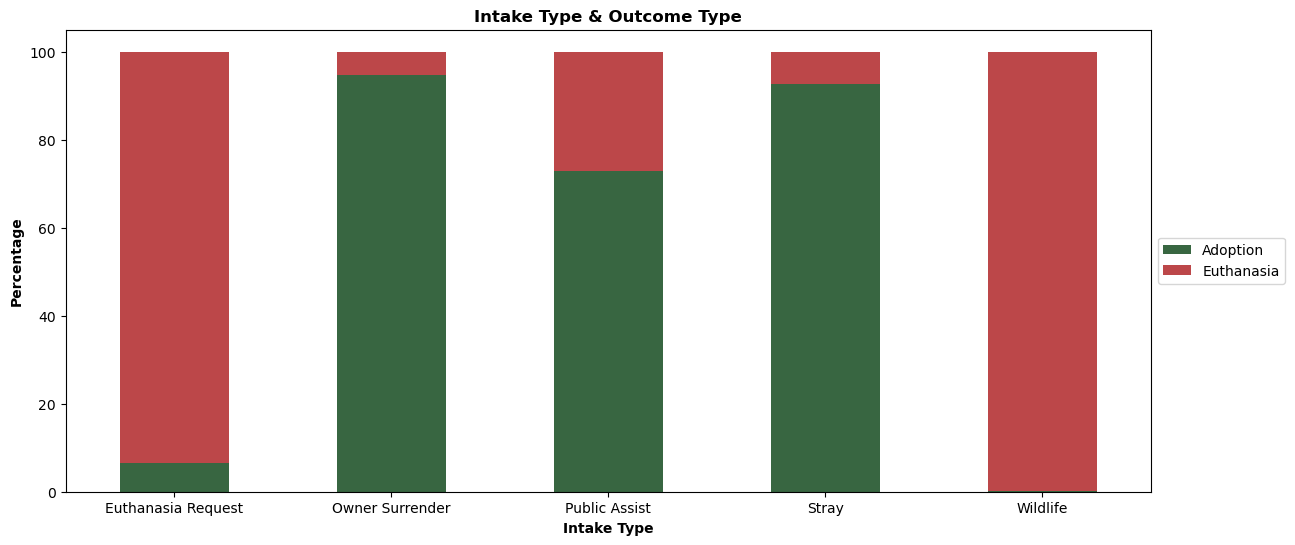

In [32]:
crosstab = pd.crosstab(df["Intake Type"], df["Outcome Type"])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)*100
crosstab_normalized.plot(kind='bar', stacked=True, color=outcome_palette)
plt.ylabel('Percentage', fontweight='bold')
plt.xlabel('Intake Type', fontweight='bold')
plt.title('Intake Type & Outcome Type', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Intake Condition
* Which intake condition is `Most Common`?
* How does the intake condition correlate with the `Outcome Type`?

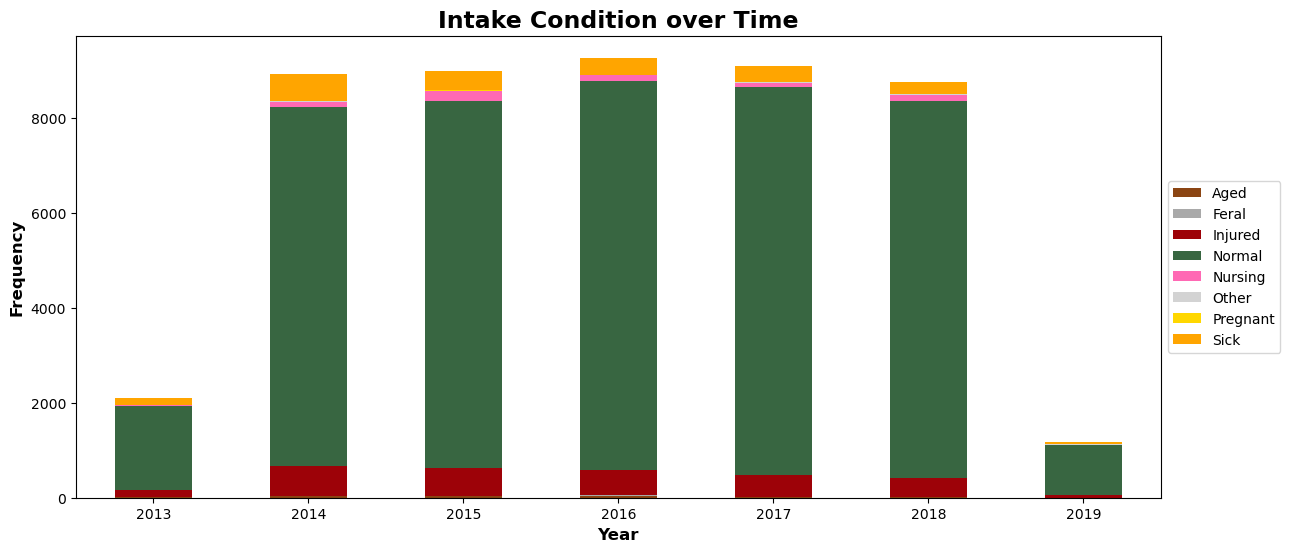

In [33]:
fig, ax = plt.subplots()
pd.crosstab(df["IntakeYear"], df["Intake Condition"]).plot.bar(stacked=True, color=condition_palette, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Intake Condition over Time", fontweight='bold', fontsize=17)
plt.xlabel("Year", fontweight='bold', fontsize=12)
plt.ylabel("Frequency", fontweight='bold', fontsize=12)
plt.xticks(rotation=0);

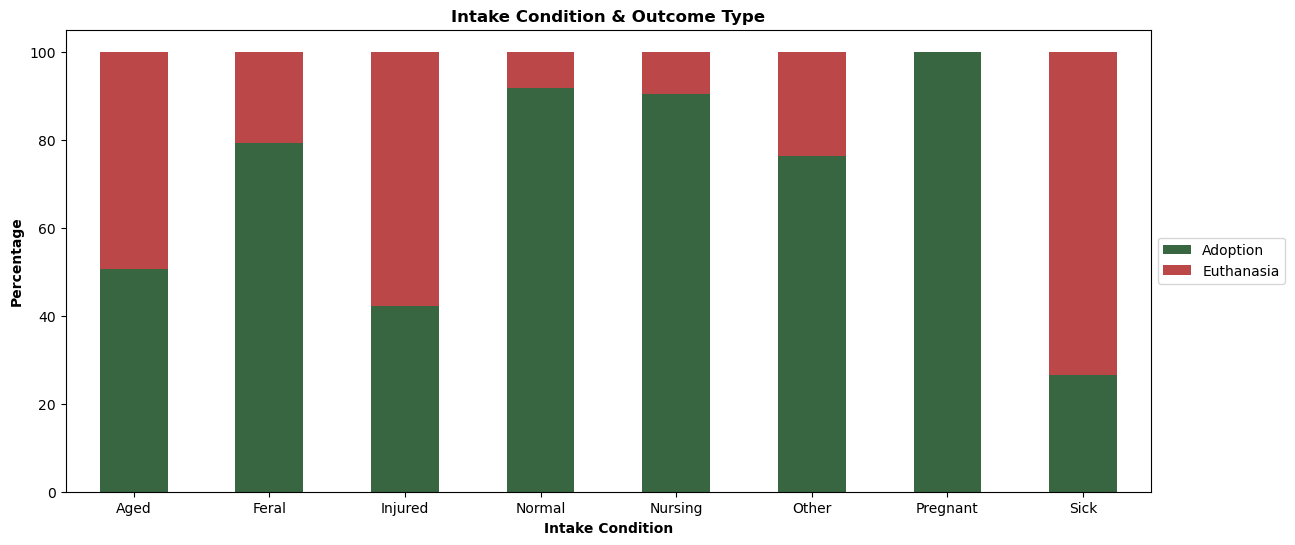

In [34]:
crosstab = pd.crosstab(df["Intake Condition"], df["Outcome Type"])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)*100
crosstab_normalized.plot(kind='bar', stacked=True, color=outcome_palette)
plt.ylabel('Percentage', fontweight='bold')
plt.xlabel('Intake Condition', fontweight='bold')
plt.title('Intake Condition & Outcome Type', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# Sex
* Is there a significant difference in outcomes based on sex upon outcome?

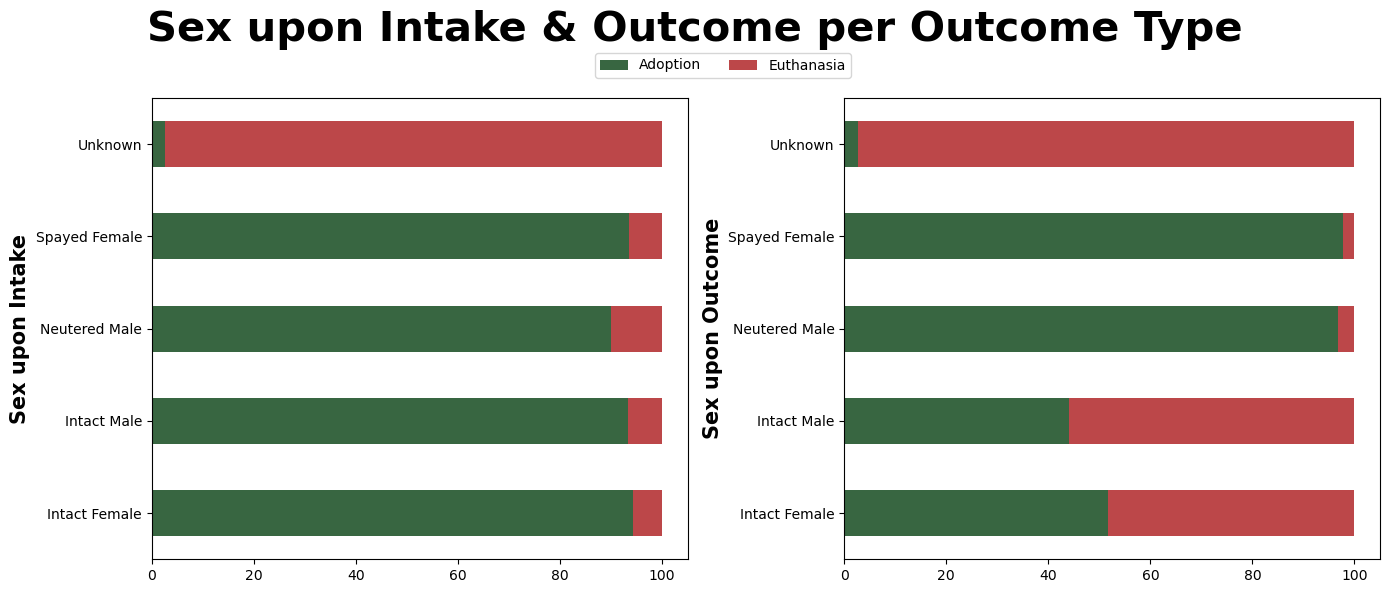

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Calculating the frequency of outcome type in different sex category upon intake & outcome
sex_in = pd.crosstab(df["Sex upon Intake"], df["Outcome Type"])
sex_in_normalized = sex_in.div(sex_in.sum(axis=1), axis=0)*100


# Calculating the relative frequency of outcome type in different sex category upon intake & outcome
sex_out = pd.crosstab(df["Sex upon Outcome"], df["Outcome Type"])
sex_out_normalized = sex_out.div(sex_out.sum(axis=1), axis=0)*100

# Plotting
ax1 = sex_in_normalized.plot(kind='barh', stacked=True, color=outcome_palette, ax=ax1)
ax2 = sex_out_normalized.plot(kind='barh', stacked=True, color=outcome_palette, ax=ax2)

# Chart Annotation
plt.suptitle('Sex upon Intake & Outcome per Outcome Type', fontweight='bold', fontsize = 30)
fig.legend(ax1.get_legend_handles_labels()[0], ax1.get_legend_handles_labels()[1], loc='upper center',
           ncol=2, bbox_to_anchor=(0.52, 0.92))

ax1.legend_.remove()
ax2.legend_.remove()

ax1.set_ylabel('Sex upon Intake', fontweight='bold', fontsize=15)
ax2.set_ylabel('Sex upon Outcome', fontweight='bold', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [36]:
# Since the distribution of Sex is different at intake and outcome, we need a boolean variable
# to consider the effect of any surgey on the outcome

df["Surgery"] = df["Sex upon Intake"] == df["Sex upon Outcome"]

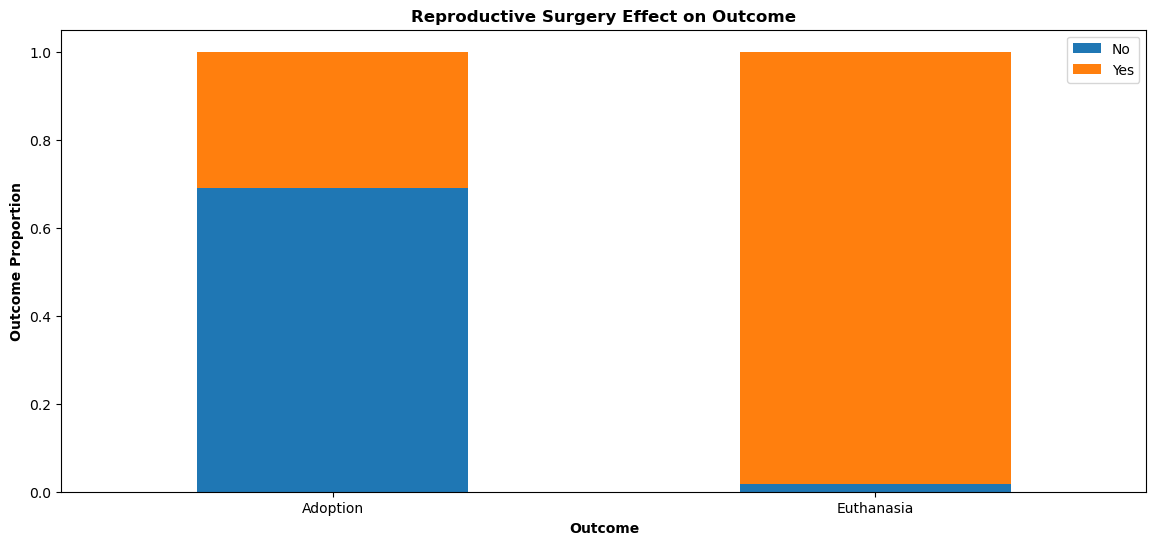

In [37]:
df.groupby("Outcome Type")['Surgery'].value_counts(normalize= True).unstack().plot(kind= 'bar',
                                                                                   stacked= True)

plt.xticks(rotation=0)
plt.title('Reproductive Surgery Effect on Outcome', fontweight= 'bold')
plt.ylabel('Outcome Proportion', fontweight= 'bold')
plt.xlabel('Outcome', fontweight= 'bold')
plt.legend(['No', 'Yes'])
plt.show()

# Weight

In [38]:
df.groupby("Animal Type")[["Weight at Intake (lbs)*", "Weight at Outcome (lbs)*"]].mean()

,Weight at Intake (lbs)*,Weight at Outcome (lbs)*
Animal Type,,
Bird,NaN,NaN
Cat,6.563525,8.840482
Dog,39.393633,39.417198
Livestock,NaN,NaN
Other,NaN,NaN


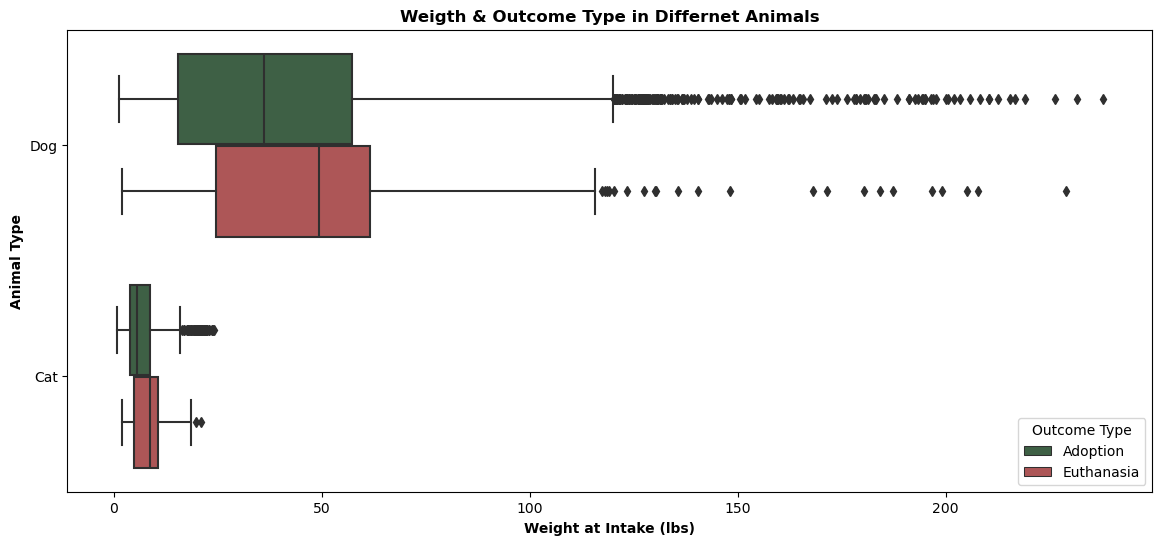

In [39]:
mask = df["Animal Type"].isin(['Cat', 'Dog'])
sns.boxplot(df[mask], y="Animal Type", hue="Outcome Type", x="Weight at Intake (lbs)*", palette=outcome_palette)

plt.ylabel('Animal Type', fontweight='bold')
plt.xlabel('Weight at Intake (lbs)', fontweight='bold')
plt.title('Weigth & Outcome Type in Differnet Animals', fontweight='bold');

Weight values show that as the animal gain weight, they are more probable to be `euthanized`. However, since other animals except for dogs and cats have no recorded weight values and we have no means to impute them, we will discard this feature for our predictive model.

# Age

In [40]:
df[df["AgeAtIntake"]<0]

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,IntakeMonthNo,IntakeMonthName,IntakeWeekDayNo,OutcomeYear,OutcomeMonthNo,OutcomeWeekDay,OutcomeWeekDayNo,IntakeHour,OutcomeHour,Surgery
5050,A678670,1,2014-05-11 02:46:00.019,2014-07-12 08:26:59.971,2014-05-21,Owner Surrender,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,5,May,6,2014,7,Sat,5,2,8,False
5051,A678667,1,2014-05-11 02:46:00.019,2014-08-04 01:52:59.981,2014-06-08,Owner Surrender,Normal,Cat,Intact Male,Domestic Shorthair Mix,...,5,May,6,2014,8,Mon,0,2,1,False
5611,A680312,1,2014-05-29 10:00:00.029,2014-08-10 05:17:00.010,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,5,False
5612,A680306,1,2014-05-29 10:00:00.029,2014-08-10 05:41:00.038,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,5,False
5613,A680307,1,2014-05-29 10:00:00.029,2014-08-10 05:28:59.981,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,5,False
5614,A680313,1,2014-05-29 10:00:00.029,2014-08-23 04:41:00.010,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sat,5,10,4,False
5615,A680315,1,2014-05-29 10:00:00.029,2014-08-10 05:01:00.019,2014-06-01,Stray,Nursing,Dog,Intact Female,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,5,False
5617,A680311,1,2014-05-29 10:00:00.029,2014-08-10 05:42:59.962,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,5,False
5618,A680305,1,2014-05-29 10:00:00.029,2014-08-13 10:41:59.971,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Wed,2,10,10,False
5619,A680309,1,2014-05-29 10:00:00.029,2014-08-10 06:40:00.019,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,5,May,3,2014,8,Sun,6,10,6,False


Some ages are negative which is not possible, so we calculate the age from `Intake Date` to see if this problem resolves.

In [41]:
df["Age"] = (df["IntakeDT"] - df["DOB"]).dt.days / 365
df[df.Age < 0]

,Animal ID,Name,IntakeDT,OutcomeDT,DOB,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,...,IntakeMonthName,IntakeWeekDayNo,OutcomeYear,OutcomeMonthNo,OutcomeWeekDay,OutcomeWeekDayNo,IntakeHour,OutcomeHour,Surgery,Age
5050,A678670,1,2014-05-11 02:46:00.019,2014-07-12 08:26:59.971,2014-05-21,Owner Surrender,Normal,Cat,Intact Female,Domestic Shorthair Mix,...,May,6,2014,7,Sat,5,2,8,False,-0.027397
5051,A678667,1,2014-05-11 02:46:00.019,2014-08-04 01:52:59.981,2014-06-08,Owner Surrender,Normal,Cat,Intact Male,Domestic Shorthair Mix,...,May,6,2014,8,Mon,0,2,1,False,-0.076712
5611,A680312,1,2014-05-29 10:00:00.029,2014-08-10 05:17:00.010,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sun,6,10,5,False,-0.008219
5612,A680306,1,2014-05-29 10:00:00.029,2014-08-10 05:41:00.038,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sun,6,10,5,False,-0.008219
5613,A680307,1,2014-05-29 10:00:00.029,2014-08-10 05:28:59.981,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sun,6,10,5,False,-0.008219
5614,A680313,1,2014-05-29 10:00:00.029,2014-08-23 04:41:00.010,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sat,5,10,4,False,-0.008219
5615,A680315,1,2014-05-29 10:00:00.029,2014-08-10 05:01:00.019,2014-06-01,Stray,Nursing,Dog,Intact Female,Australian Kelpie,...,May,3,2014,8,Sun,6,10,5,False,-0.008219
5617,A680311,1,2014-05-29 10:00:00.029,2014-08-10 05:42:59.962,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sun,6,10,5,False,-0.008219
5618,A680305,1,2014-05-29 10:00:00.029,2014-08-13 10:41:59.971,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Wed,2,10,10,False,-0.008219
5619,A680309,1,2014-05-29 10:00:00.029,2014-08-10 06:40:00.019,2014-06-01,Stray,Nursing,Dog,Intact Male,Australian Kelpie,...,May,3,2014,8,Sun,6,10,6,False,-0.008219


In [42]:
df[df.Age < 0].groupby(["Animal Type"])["Weight at Intake (lbs)*"].mean()

Animal Type
Cat    1.686667
Dog    5.473125
Name: Weight at Intake (lbs)*, dtype: float64

Even after calculating the age ourselves, we have some negative age ranges and when checking their weight values with the average of their peer animal type, it suggests that they were probably born in the animal shelter and it was their parents who have been intaken to the shelter. Thus, we will consider them to be 0.

In [43]:
indices = df[df.Age < 0].index
df.loc[indices, "Age"] = 0

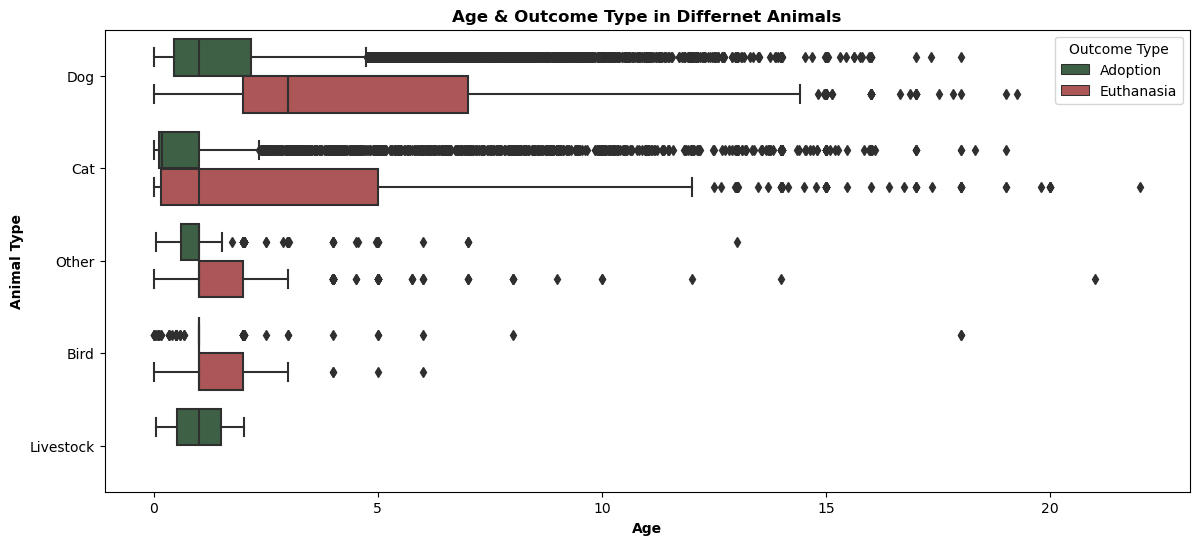

In [44]:
sns.boxplot(df, y="Animal Type", hue="Outcome Type", x="Age", palette=outcome_palette)

plt.ylabel('Animal Type', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.title('Age & Outcome Type in Differnet Animals', fontweight='bold');

# Obedience

In [45]:
mask = df["Obedience*"].isna()
df[mask]["Animal Type"].unique()

array(['Cat', 'Other', 'Bird', 'Livestock'], dtype=object)

In [46]:
df[~mask]["Animal Type"].unique()

array(['Dog'], dtype=object)

In [47]:
pd.crosstab(df["Obedience*"], df["Outcome Type"])

Outcome Type,Adoption,Euthanasia
Obedience*,,
1.0,5113,325
2.0,5129,311
3.0,5042,327
4.0,5065,320
5.0,4972,277


Although `Obedience` levels is only recorded for `Dogs`, it seemed at first that we can consider the others untrained (No obedience); however, since there are almost no difference at various obedience levels considering the `Outcome Type` and since this feature has more than `%50` missing values, we discard it for our predictive model.

# Height
Same as weight.

In [48]:
df.groupby("Animal Type")[["Height (in)*"]].mean()

,Height (in)*
Animal Type,
Bird,NaN
Cat,6.059796
Dog,15.703239
Livestock,NaN
Other,NaN


# Color

In [49]:
def categorize_color(color):
    if 'Black' in color or 'Gray' in color or 'Blue' in color:
        return 'Dark Colors'
    elif 'Orange' in color or 'Buff' in color or 'Cream' in color or 'Apricot' in color or 'Fawn' in color:
        return 'Orange/Cream Tones'
    elif 'Tabby' in color or 'Tiger' in color or 'Brindle' in color or 'Agouti' in color:
        return 'Patterned'
    elif 'Calico' in color or 'Tortie' in color or 'Torbie' in color or 'Tricolor' in color:
        return 'Calico/Tortie'
    elif 'Point' in color:
        return 'Point Color'
    elif 'White' in color:
        return 'White'
    else:
        return 'Other'

df['Color Category'] = df['Color'].apply(categorize_color)

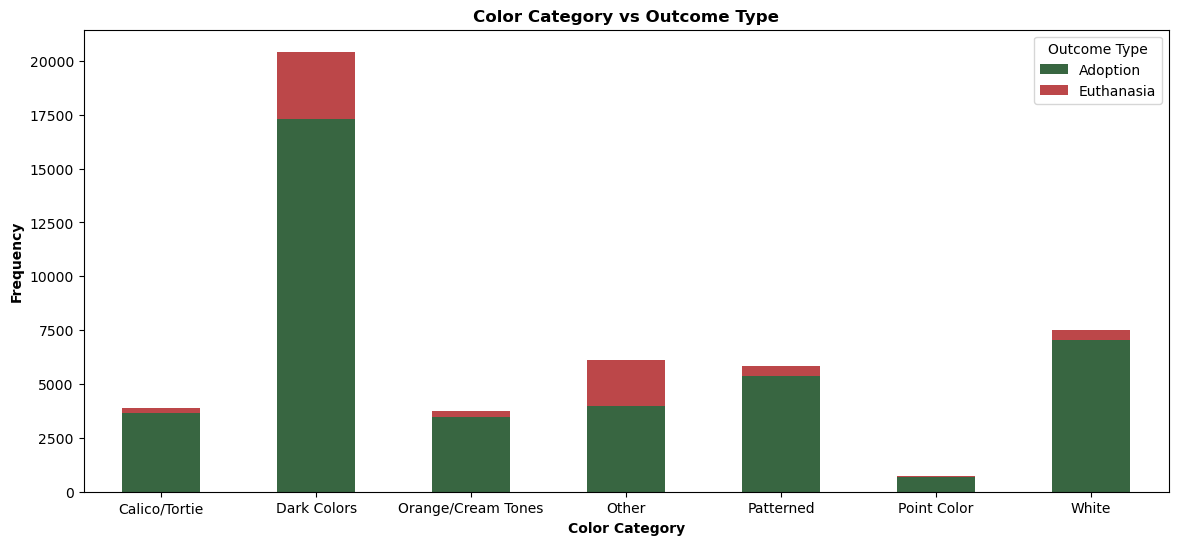

In [50]:
pd.crosstab(df["Color Category"], df["Outcome Type"]).plot.bar(stacked=True, color=outcome_palette)
plt.title("Color Category vs Outcome Type", fontweight='bold')
plt.xlabel("Color Category", fontweight='bold')
plt.ylabel("Frequency", fontweight='bold')
plt.xticks(rotation=0);

# Breed

In [51]:
df['Breed'].head(10)

0         Dachshund/Chihuahua Shorthair
1                        Siberian Husky
2                   Chihuahua Shorthair
3                   Chihuahua Shorthair
4    Yorkshire Terrier/Miniature Poodle
5                       Norfolk Terrier
6                Domestic Shorthair Mix
7                   Chihuahua Shorthair
8                   Chihuahua Shorthair
9                Domestic Shorthair Mix
Name: Breed, dtype: object

In [52]:
df['Breed'].nunique()

1640

In [53]:
mask = df["Breed"].str.contains('/', case=False)
mix_indices = df["Breed"][mask].index
df.loc[mix_indices, 'Breed']

0                   Dachshund/Chihuahua Shorthair
4              Yorkshire Terrier/Miniature Poodle
12                 Anatol Shepherd/Great Pyrenees
13             Anatol Shepherd/Labrador Retriever
14                 Anatol Shepherd/Great Pyrenees
                           ...                   
48309                             Black/Tan Hound
48310              Anatol Shepherd/Great Pyrenees
48315    Australian Cattle Dog/Labrador Retriever
48317         Chihuahua Longhair/Miniature Poodle
48323                Dachshund/Labrador Retriever
Name: Breed, Length: 4868, dtype: object

In [54]:
def animal_groups(df):
    breed = df['Breed'].lower()
    
    # Birds
    if df["Animal Type"] == 'Bird':
        if any(keyword in breed for keyword in ['chicken', 'bantam', 'duck', 'muscovy', 'turkey', 'rhode']):
            return 'Common Domestic Birds'
        elif any(keyword in breed for keyword in ['pigeon', 'dove', 'lovebird']):
            return 'Pigeons and Doves'
        elif any(keyword in breed for keyword in ['parrot', 'cockatiel', 'parakeet', 'cockatoo', 'budgerigar', 'conure', 'quaker']):
            return 'Parrots and Parakeets'
        elif any(keyword in breed for keyword in ['finch', 'song bird', 'chickadee']):
            return 'Finches and Songbirds'
        elif any(keyword in breed for keyword in ['lark', 'bluebird', 'grackle', 'mockingbird', 'sparrow', 'whimbrel']):
            return 'Wild Birds'
        elif any(keyword in breed for keyword in ['hawk', 'vulture', 'owl']):
            return 'Birds of Prey'
        elif any(keyword in breed for keyword in ['peafowl', 'heron']):
            return 'Exotic and Specialty Birds'

    # Livestock
    elif df["Animal Type"] == 'Livestock':
        if any(keyword in breed for keyword in ['pig']):
            return 'Pig'
    
    
    # Other
    elif df["Animal Type"] == 'Other':
        if any(keyword in breed for keyword in ['rat', 'hamster', 'guinea pig', 'ferret', 'sugar glider', 'mouse', 'prairie dog']):
            return 'Rodents and Small Mammals'
        elif any(keyword in breed for keyword in ['hedgehog', 'squirrel', 'bat','raccoon', 'skunk', 'opossum', 'fox', 'armadillo', 'coyote', 'bobcat', 'otter']):
            return 'Wildlife and Exotic Mammals'
        elif any(keyword in breed for keyword in ['snake', 'turtle', 'lizard', 'hermit crab', 'tortoise']):
            return 'Reptiles and Amphibians'
        elif any(keyword in breed for keyword in ['rabbit', 'lop', 'lionhead', 'rex', 'dutch', 'english spot', 'angora', 'flemish giant', 'belgian hare']):
            return 'Rabbits and Other Lagomorphs'
    
    
    # Cats
    elif df["Animal Type"] == 'Cat':
        if 'mix' in breed:
            return 'Mixed Breeds'
        elif 'domestic' in breed:
            return 'Domestic Cats'
        elif any(keyword in breed for keyword in ['bengal', 'persian', 'siamese', 'maine coon', 'ragdoll', 'himalayan', 'russian blue',
                                                 'sphynx', 'british shorthair', 'norwegian forest cat', 'devon rex', 'chartreux',
                                                 'turkish van', 'american wirehair', 'bombay', 'javanese', 'havana brown',
                                                 'scottish fold', 'ocicat', 'cornish rex', 'turkish angora', 'american curl',
                                                 'balinese', 'burmese', 'snowshoe']):
            return 'Purebred Cats'
    
    
    # Dogs
    elif df["Animal Type"] == 'Dog':
        if any(keyword in breed for keyword in ['australian shepherd', 'border collie', 'collie', 'shetland sheepdog', 'corgi', 'german shepherd', 'australian terrier', 'swedish vallhund', 'australian cattle dog', 'border terrier', 'australian kelpie']):
            return 'Herding'
        elif any(keyword in breed for keyword in ['beagle', 'dachshund', 'greyhound', 'bloodhound', 'whippet', 'great pyrenees', 'vizsla', 'harrier', 'chesa bay retr', 'basset hound', 'catahoula', 'plott hound', 'pharaoh hound', 'bluetick hound', 'redbone hound', 'walker coonhound', 'foxhound', 'coonhound', 'treeing tennessee brindle', 'queensland heeler']):
            return 'Hound'
        elif any(keyword in breed for keyword in ['chihuahua', 'pomeranian', 'maltese', 'pug', 'shih tzu']):
            return 'Toy'
        elif any(keyword in breed for keyword in ['bull terrier', 'jack russell terrier', 'scottish terrier', 'west highland white terrier', 'norfolk terrier', 'american staffordshire terrier', 'australian terrier', 'border terrier', 'pit bull']):
            return 'Terrier'
        elif any(keyword in breed for keyword in ['boxer', 'great dane', 'mastiff', 'saint bernard', 'siberian husky', 'belgian malinois', 'rottweiler', 'staffordshire', 'st. bernard rough coat','dogo argentino', 'cane corso', 'st. bernard smooth coat']):
            return 'Working'
        elif any(keyword in breed for keyword in ['labrador retriever', 'golden retriever', 'pointer', 'spaniel', 'setter']):
            return 'Sporting'
        elif any(keyword in breed for keyword in ['bulldog', 'poodle', 'dalmatian', 'chow chow']):
            return 'Non-Sporting'
        elif any(keyword in breed for keyword in ['mix', '/']):
            return 'Mixed Breed'
        elif any(keyword in breed for keyword in ['yorkshire terrier', 'miniature pinscher', 'anatol shepherd', 'carolina dog', 'chinese sharpei', 'basenji', 'miniature schnauzer', 'finnish spitz', 'rat terrier', 'rhod ridgeback', 'brittany', 'cairn terrier', 'norwich terrier', 'lhasa apso', 'keeshond', 'leonberger', 'soft coated wheaten terrier', 'welsh terrier', 'doberman pinsch', 'american eskimo', 'boston terrier', 'schipperke', 'parson russell terrier', 'bruss griffon', 'schnauzer giant', 'schnauzer standard', 'pbgv', 'picardy sheepdog', 'beauceron', 'papillon', 'bichon frise', 'cavalier span', 'affenpinscher', 'tibetan terrier', 'skye terrier', 'west highland', 'weimaraner', 'dutch shepherd', 'belgian sheepdog', 'smooth fox terrier', 'wire hair fox terrier', 'shiba inu', 'feist', 'manchester terrier', 'german pinscher', 'chinese crested', 'pekingese', 'canaan dog', 'akita', 'kuvasz', 'dogue de bordeaux', 'english coonhound', 'boerboel', 'alaskan husky', 'greater swiss mountain dog', 'saluki', 'alaskan malamute', 'samoyed', 'tibetan mastiff', 'newfoundland', 'havanese', 'ibizan hound', 'presa canario', 'irish terrier', 'belgian tervuren', 'glen of imaal', 'boykin span', 'patterdale terr', 'treeing cur', 'airedale terrier', 'otterhound', 'landseer', 'toy fox terrier', 'english shepherd', 'bernese mountain dog', 'sealyham terr', 'bedlington terr', 'lowchen', 'norwegian elkhound', 'akbash', 'hovawart', 'jindo', 'lakeland terrier', 'grand basset griffon vendeen', 'wirehaired pointing griffon', 'dandie dinmont', 'mexican hairless', 'swedish vallhund', 'blue lacy', 'black mouth cur', 'port water dog', 'nova scotia duck tolling retriever', 'coton de tulear', 'podengo pequeno', 'irish wolfhound', 'silky terrier', 'flat coat retriever']):
            return 'Miscellaneous'
    return 'Other'

In [55]:
df["AnimalGroups"] = df.apply(animal_groups, axis=1)

In [56]:
df["AnimalGroups"].nunique()

25

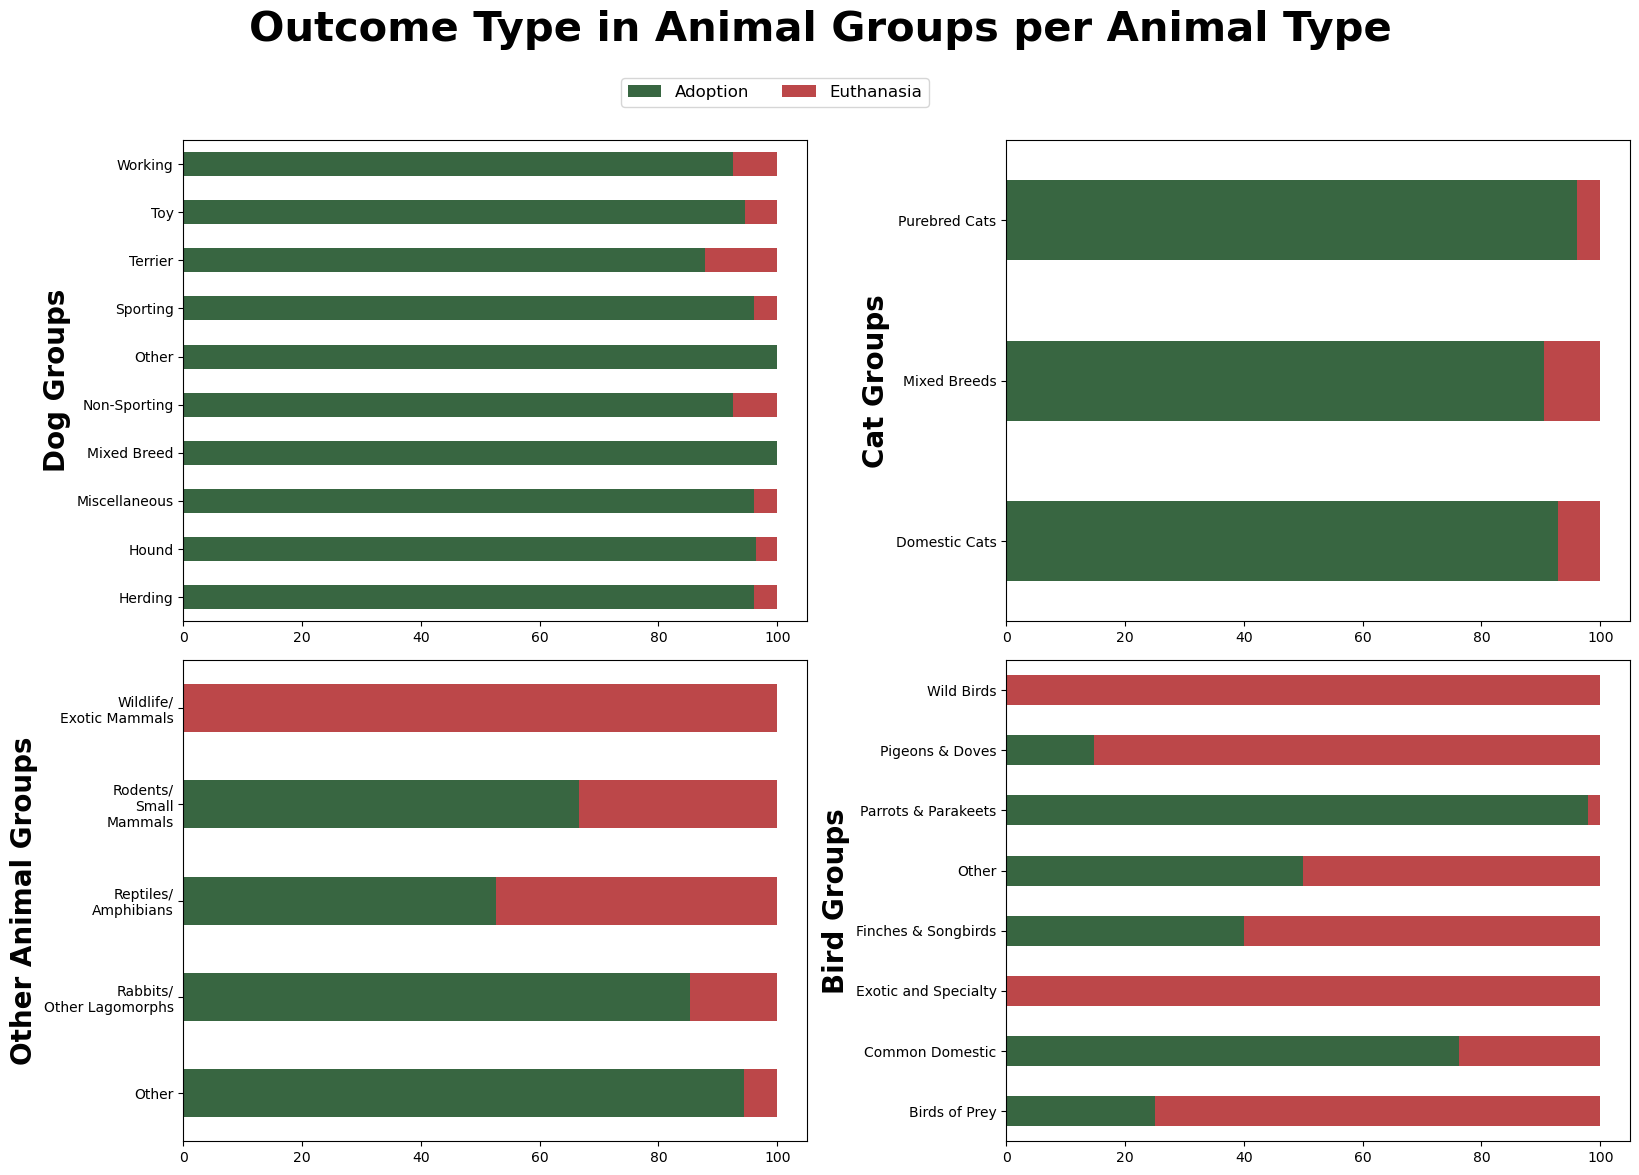

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

(df[df["Animal Type"] == 'Dog'].groupby('AnimalGroups')["Outcome Type"].value_counts(
    normalize=True)*100).unstack().plot(kind='barh', stacked=True, ax= ax[0, 0], color=outcome_palette)
(df[df["Animal Type"] == 'Cat'].groupby('AnimalGroups')["Outcome Type"].value_counts(
    normalize=True)*100).unstack().plot(kind='barh', stacked=True, ax= ax[0, 1], color=outcome_palette)
(df[df["Animal Type"] == 'Other'].groupby('AnimalGroups')["Outcome Type"].value_counts(
    normalize=True)*100).unstack().plot(kind='barh', stacked=True, ax= ax[1, 0], color=outcome_palette)
(df[df["Animal Type"] == 'Bird'].groupby('AnimalGroups')["Outcome Type"].value_counts(
    normalize=True)*100).unstack().plot(kind='barh', stacked=True, ax= ax[1, 1], color=outcome_palette)

# Setting Title & Legend for the figure
fig.suptitle('Outcome Type in Animal Groups per Animal Type', fontweight='bold', fontsize = 30, x=0.55, y=0.98)
fig.legend(ax[0, 0].get_legend_handles_labels()[0], ax[0, 0].get_legend_handles_labels()[1],
           loc='upper center', ncol=4, bbox_to_anchor=(0.52, 0.94), fontsize=12)

# Removing the legends of subplots
for axes in ax.flat:
    axes.legend_.remove()

# Set the y-axis labels for each subplot
ax[0, 0].set_ylabel('Dog Groups', fontweight='bold', fontsize=20)
ax[0, 1].set_ylabel('Cat Groups', fontweight='bold', fontsize=20)
ax[1, 0].set_ylabel('Other Animal Groups', fontweight='bold', fontsize=20)
ax[1, 1].set_ylabel('Bird Groups', fontweight='bold', fontsize=20)


# Renaming yticks that are long
ax[1, 0].set_yticklabels(['Other', 'Rabbits/\nOther Lagomorphs', 'Reptiles/\nAmphibians',
                          'Rodents/\nSmall\nMammals','Wildlife/\nExotic Mammals'])
ax[1, 1].set_yticklabels(['Birds of Prey', 'Common Domestic', 'Exotic and Specialty', 'Finches & Songbirds',
                          'Other', 'Parrots & Parakeets', 'Pigeons & Doves', 'Wild Birds'])

plt.tight_layout(rect=[0, 0.2, 1.1, 0.94])
plt.show()

# Brought Before

In [58]:
df[df["Brought Before"]== True]["Intake Condition"].value_counts(normalize= True)

Intake Condition
Normal      0.959260
Injured     0.022232
Sick        0.010637
Nursing     0.004787
Aged        0.002127
Other       0.000532
Pregnant    0.000425
Name: proportion, dtype: float64

In [59]:
df.to_csv('./data/animal_shelter_cleaned.csv')

# Modelling

In [60]:
df.columns

Index(['Animal ID', 'Name', 'IntakeDT', 'OutcomeDT', 'DOB', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color',
       'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Obedience*',
       'Weight at Intake (lbs)*', 'Height (in)*', 'Weight at Outcome (lbs)*',
       'AgeAtIntake', 'TimeAtShelter', 'AgeAtOutcome', 'Brought Before',
       'IntakeYear', 'IntakeMonthNo', 'IntakeMonthName', 'IntakeWeekDayNo',
       'OutcomeYear', 'OutcomeMonthNo', 'OutcomeWeekDay', 'OutcomeWeekDayNo',
       'IntakeHour', 'OutcomeHour', 'Surgery', 'Age', 'Color Category',
       'AnimalGroups'],
      dtype='object')

In [61]:
df = df.sort_values(by='IntakeDT').reset_index(drop=True)
modelling_df = df.drop(['Animal ID', 'IntakeDT', 'OutcomeDT', 'DOB', 'Breed', 'Color', 'Outcome Subtype',
                       'Sex upon Outcome', 'Obedience*', 'AgeAtIntake', 'AgeAtOutcome', 'IntakeMonthName',
                        'OutcomeYear', 'OutcomeMonthNo', 'OutcomeWeekDay', 'OutcomeWeekDayNo', 'Weight at Intake (lbs)*',
                       'Height (in)*', 'Weight at Outcome (lbs)*'], axis=1)
modelling_df.head()

,Name,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Outcome Type,TimeAtShelter,Brought Before,IntakeYear,IntakeMonthNo,IntakeWeekDayNo,IntakeHour,OutcomeHour,Surgery,Age,Color Category,AnimalGroups
0,1,Stray,Normal,Dog,Intact Female,Adoption,12,False,2013,10,1,1,3,False,1.501370,Other,Hound
1,1,Owner Surrender,Normal,Dog,Intact Female,Adoption,10,False,2013,10,1,1,3,False,8.005479,Orange/Cream Tones,Working
2,1,Stray,Normal,Dog,Intact Male,Adoption,12,False,2013,10,1,2,5,False,2.002740,Calico/Tortie,Toy
3,1,Stray,Normal,Dog,Intact Female,Adoption,8,False,2013,10,1,2,4,False,0.747945,White,Toy
4,1,Euthanasia Request,Injured,Dog,Spayed Female,Adoption,79,False,2013,10,1,2,4,True,1.654795,Dark Colors,Non-Sporting


In [62]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48352 entries, 0 to 48351
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              48352 non-null  int64  
 1   Intake Type       48352 non-null  object 
 2   Intake Condition  48352 non-null  object 
 3   Animal Type       48352 non-null  object 
 4   Sex upon Intake   48352 non-null  object 
 5   Outcome Type      48352 non-null  object 
 6   TimeAtShelter     48352 non-null  int64  
 7   Brought Before    48352 non-null  bool   
 8   IntakeYear        48352 non-null  int32  
 9   IntakeMonthNo     48352 non-null  int32  
 10  IntakeWeekDayNo   48352 non-null  int32  
 11  IntakeHour        48352 non-null  int32  
 12  OutcomeHour       48352 non-null  int32  
 13  Surgery           48352 non-null  bool   
 14  Age               48352 non-null  float64
 15  Color Category    48352 non-null  object 
 16  AnimalGroups      48352 non-null  object

In [63]:
# Changing data type of Object to Category for our model
cat_mask = modelling_df.select_dtypes('object').drop('Outcome Type', axis=1).columns
modelling_df[cat_mask] = modelling_df[cat_mask].apply(lambda x: x.astype('category').cat.codes)

In [64]:
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48352 entries, 0 to 48351
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              48352 non-null  int64  
 1   Intake Type       48352 non-null  int8   
 2   Intake Condition  48352 non-null  int8   
 3   Animal Type       48352 non-null  int8   
 4   Sex upon Intake   48352 non-null  int8   
 5   Outcome Type      48352 non-null  object 
 6   TimeAtShelter     48352 non-null  int64  
 7   Brought Before    48352 non-null  bool   
 8   IntakeYear        48352 non-null  int32  
 9   IntakeMonthNo     48352 non-null  int32  
 10  IntakeWeekDayNo   48352 non-null  int32  
 11  IntakeHour        48352 non-null  int32  
 12  OutcomeHour       48352 non-null  int32  
 13  Surgery           48352 non-null  bool   
 14  Age               48352 non-null  float64
 15  Color Category    48352 non-null  int8   
 16  AnimalGroups      48352 non-null  int8  

In [65]:
# Separating features & target values
X = modelling_df.drop('Outcome Type', axis=1)
y = modelling_df['Outcome Type']

In [66]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating the model
model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=7)

# Trainging the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=7)

In [67]:
# Evaluating model performance on train data
model.score(X_train, y_train)

0.9803779633411752

In [68]:
# Evaluating model performance on test data
model.score(X_test, y_test)

0.9771481749560542

In [69]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Adoption       0.98      1.00      0.99      8311
  Euthanasia       0.99      0.85      0.91      1360

    accuracy                           0.98      9671
   macro avg       0.98      0.92      0.95      9671
weighted avg       0.98      0.98      0.98      9671



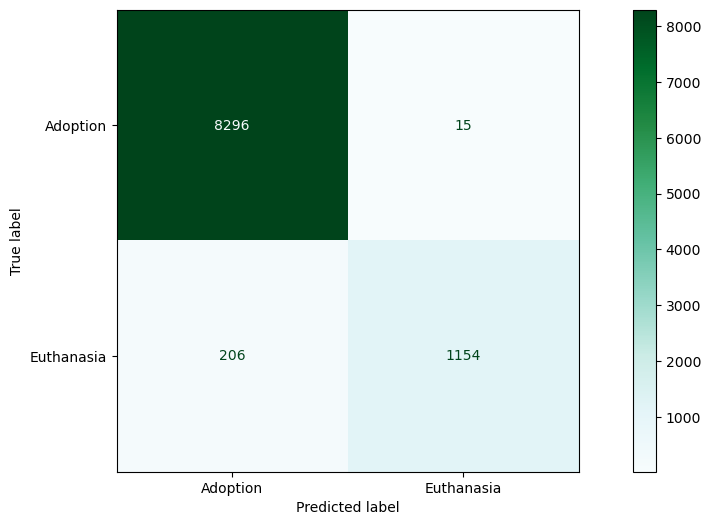

In [70]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='BuGn');

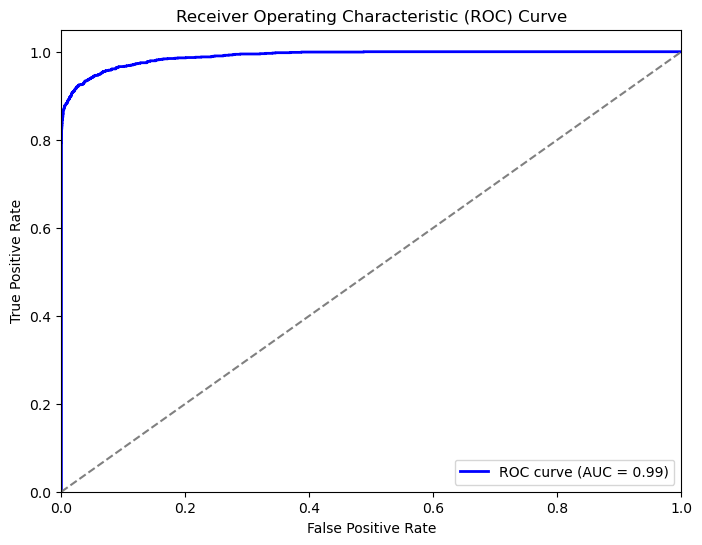

In [71]:
y_test_mapped = y_test.map({'Adoption':0, 'Euthanasia':1})
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [72]:
# Generating feature importance
importances = model.feature_importances_

importance_df = pd.DataFrame({'Features': X_train.columns,
                             'Importance Score': importances})
importance_df.sort_values('Importance Score', ascending= True, inplace= True)

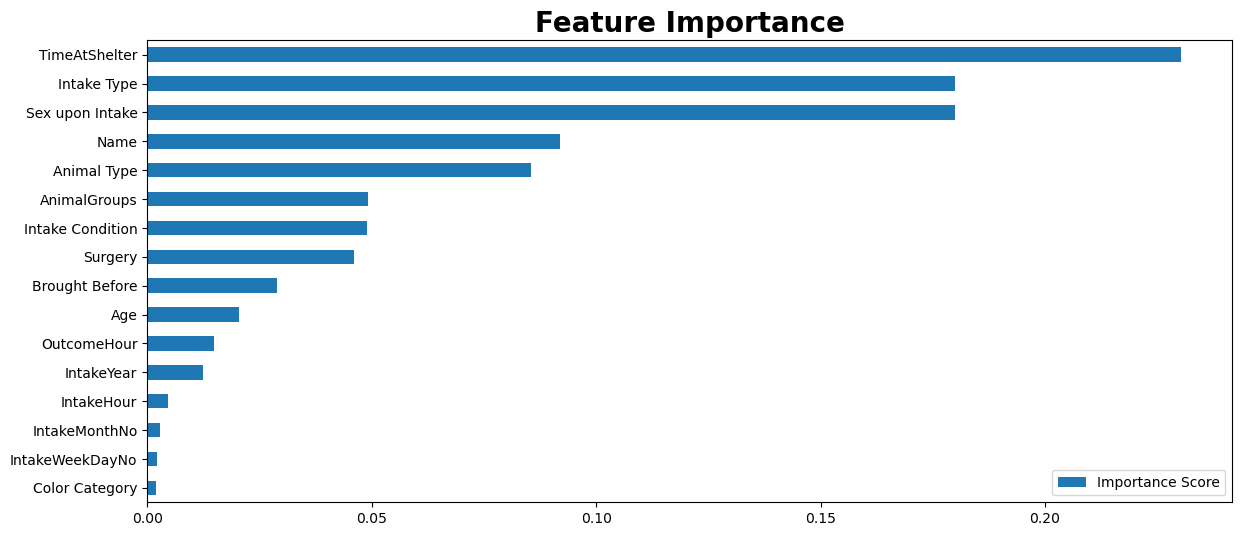

In [73]:
# Plotting feature importance

importance_df.plot(kind='barh')

plt.title('Feature Importance', fontweight='bold', fontsize=20)
plt.yticks(range(X_train.shape[1]),importance_df['Features'].to_list())
plt.show()

In [74]:
importance_df.sort_values('Importance Score',ascending=False)

,Features,Importance Score
5,TimeAtShelter,0.230175
1,Intake Type,0.179946
4,Sex upon Intake,0.179880
0,Name,0.091913
3,Animal Type,0.085408
15,AnimalGroups,0.049241
2,Intake Condition,0.048988
12,Surgery,0.046158
6,Brought Before,0.028956
13,Age,0.020516


In [75]:
modelling_df["Outcome Type"].value_counts(normalize=True)

Outcome Type
Adoption      0.857214
Euthanasia    0.142786
Name: proportion, dtype: float64

In [76]:
# Splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating the model
model = RandomForestClassifier(n_estimators=20, max_depth=10, class_weight='balanced', random_state=7)

# Trainging the model
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=20,
                       random_state=7)

In [77]:
# Evaluating model performance on train data
model.score(X_train, y_train)

0.9803262583697423

In [78]:
# Evaluating model performance on test data
model.score(X_test, y_test)

0.9735291076414021

In [79]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Adoption       0.98      0.99      0.98      8311
  Euthanasia       0.91      0.90      0.91      1360

    accuracy                           0.97      9671
   macro avg       0.95      0.94      0.94      9671
weighted avg       0.97      0.97      0.97      9671



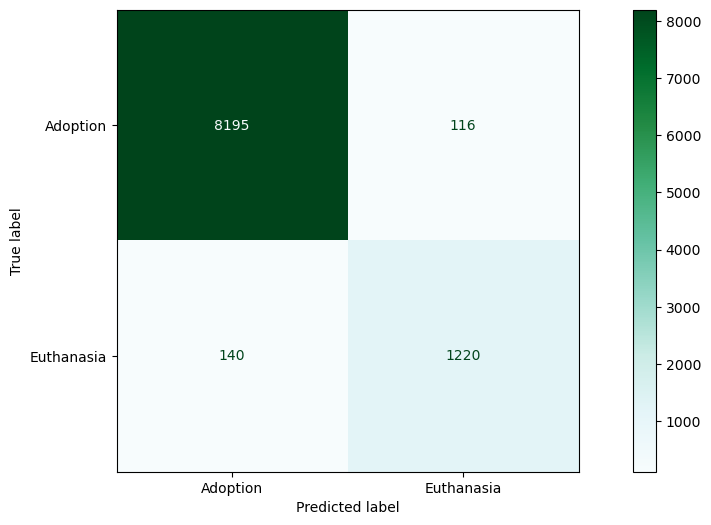

In [80]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='BuGn');

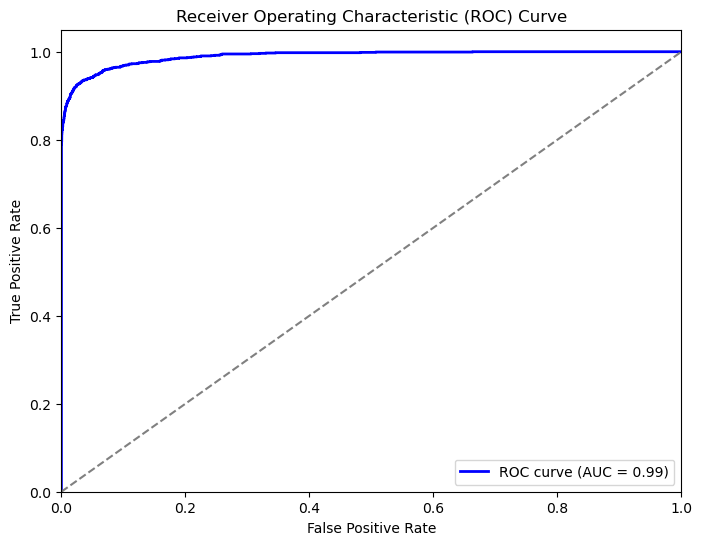

In [81]:
y_test_mapped = y_test.map({'Adoption':0, 'Euthanasia':1})
y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_mapped, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [82]:
# Generating feature importance
importances = model.feature_importances_

importance_df = pd.DataFrame({'Features': X_train.columns,
                             'Importance Score': importances})
importance_df.sort_values('Importance Score', ascending= True, inplace= True)

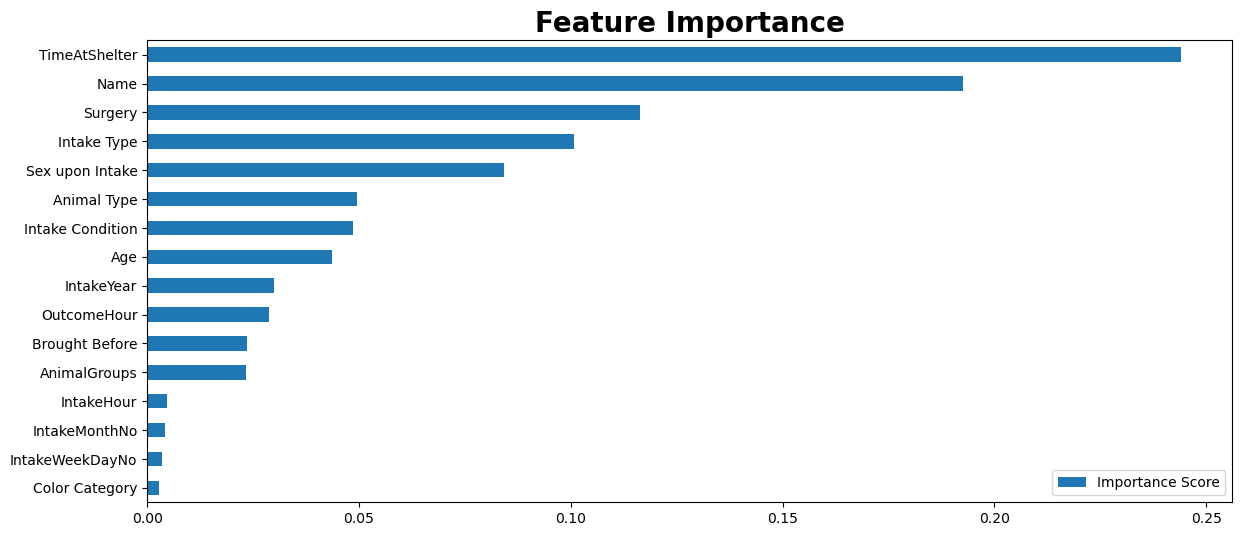

In [83]:
# Plotting feature importance

importance_df.plot(kind='barh')

plt.title('Feature Importance', fontweight='bold', fontsize=20)
plt.yticks(range(X_train.shape[1]),importance_df['Features'].to_list())
plt.show()

In [84]:
importance_df.sort_values('Importance Score',ascending=False)

,Features,Importance Score
5,TimeAtShelter,0.243943
0,Name,0.192479
12,Surgery,0.116265
1,Intake Type,0.100769
4,Sex upon Intake,0.084148
3,Animal Type,0.049544
2,Intake Condition,0.048548
13,Age,0.043554
7,IntakeYear,0.029980
11,OutcomeHour,0.028645


Since the feature importance scores changes depending on the seed number, the results are less reliable. To get mroe reliable results for business decisions, we run the model based on different seed numbers and get an `average of scores`.

In [85]:
feature_importance = list()

for seed in range(10):
    model = RandomForestClassifier(n_estimators=20, max_depth=10, class_weight='balanced', random_state=seed)
    model.fit(X_train, y_train)
    feature_importance.append(model.feature_importances_)

# Calculating average score
avg_feature_importances = np.mean(feature_importance, axis= 0)


importance_df = pd.DataFrame({'Features': X_train.columns,
                             'Importance Score': avg_feature_importances})
importance_df.sort_values(by='Importance Score', ascending= False)

,Features,Importance Score
12,Surgery,0.236210
5,TimeAtShelter,0.233175
0,Name,0.129372
4,Sex upon Intake,0.105949
1,Intake Type,0.061002
3,Animal Type,0.044665
15,AnimalGroups,0.036411
2,Intake Condition,0.034758
13,Age,0.032700
7,IntakeYear,0.027844
